In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
!conda install matplotlib scipy

In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import v2


In [3]:
print(torch.__version__)

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
 
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device: {torch.cuda.current_device()}")
       
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

2.2.1
Is CUDA supported by this system? True
CUDA version: 12.1
ID of current CUDA device: 0
Name of current CUDA device: NVIDIA GeForce RTX 3060 Ti


In [4]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

# Ładowanie danych

In [5]:
training_data = datasets.MNIST(root="./data/mnist/train", download=True, transform=transforms.ToTensor())

In [6]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
training_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [8]:
loader = DataLoader(training_data, batch_size=10)
data = next(iter(loader))
data[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [9]:
dataset_normal = datasets.MNIST(root="./data/mnist/train", download=True, transform=transforms.ToTensor())

In [10]:
transforms_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

In [11]:
train_dataset, test_dataset, valid_dataset = random_split(dataset_normal, [0.6, 0.3, 0.1])

In [12]:
train_dataset.dataset.transform = transforms_data
test_dataset.dataset.transform = transforms_data
valid_dataset.dataset.transfrom = transforms_data

In [13]:
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=1000, shuffle=False)

C:\Users\dwisn\AppData\Local\Temp\ipykernel_5804\8331284.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  plt.imshow(img.T.squeeze())


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


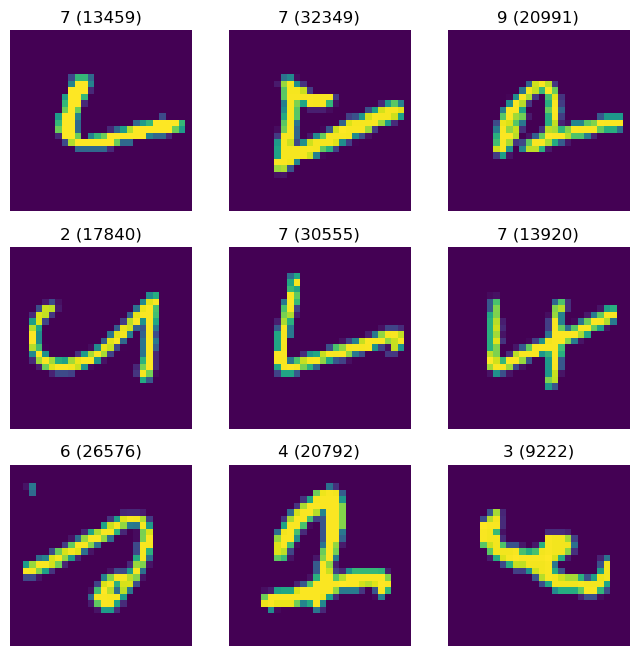

In [14]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"{label} ({sample_idx})")
    plt.axis("off")
    plt.imshow(img.T.squeeze())
    print(img.shape)
plt.show()

Feature batch shape: torch.Size([1000, 1, 28, 28])
Feature batch shape: torch.Size([1000, 1, 28, 28])


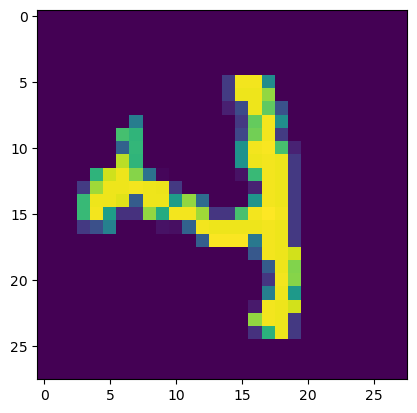

Label: 4


In [15]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Feature batch shape: {train_features.size()}")
idx = 2
img = train_features[idx].squeeze()
label = train_labels[idx]
plt.imshow(transforms.ToPILImage()(img))
plt.show()
print(f"Label: {label}")

In [128]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

In [145]:
epochs = 101
model = NeuralNetwork()

In [146]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)
#optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [147]:
train_losses = []
valid_losses = []
train_accuracy = []
valid_accuracy = []

In [148]:
train_size = len(train_dataloader.dataset)
valid_size = len(valid_dataloader.dataset)

model = model.to(device)

for i in range(epochs):   
    epoch_losses = []
    epoch_valid_losses = []
    train_samples = 0
    train_correct = 0
    valid_samples = 0
    valid_correct = 0
    
    for X_train, y_train in train_dataloader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        
        optimizer.zero_grad()
        y_pred = model.forward(X_train)
        
        loss = loss_function(y_pred, y_train)
        epoch_losses.append(loss.item())
        
        _, predicted = torch.max(y_pred, 1)
        train_correct += (predicted == y_train).sum().item()
        train_samples += y_train.size(0)
        
        loss.backward()
        optimizer.step()
    
    accuracy = 100 * train_correct / train_samples
    epoch_loss = torch.tensor(epoch_losses).mean()
    train_losses.append(epoch_loss)
    train_accuracy.append(accuracy)
    
    with torch.no_grad():
        valid_losses_local = []
        for X_valid, y_valid in valid_dataloader:
            X_valid = X_valid.to(device)
            y_valid = y_valid.to(device)
            y_pred = model.forward(X_valid)
            loss = loss_function(y_pred, y_valid)
            
            valid_losses_local.append(loss.item())
            
            _, predicted = torch.max(y_pred, 1)
            valid_correct += (predicted == y_valid).sum().item()
            valid_samples += y_valid.size(0)
        
        v_accuracy = 100 * valid_correct / valid_samples
        valid_loss = torch.tensor(valid_losses_local).mean()
        valid_losses.append(valid_loss)
        valid_accuracy.append(v_accuracy)
        
    if i % 5 == 0:
        print(f'Epoch: {i}, Loss: {epoch_loss:.6f}, Valid: {valid_loss:.6f}, Accuracy train: {accuracy:.2f}, Accuracy valid: {v_accuracy:.2f}')

Epoch: 0, Loss: 2.032193, Valid: 1.370533, Accuracy train: 36.94, Accuracy valid: 59.80
Epoch: 5, Loss: 0.295022, Valid: 0.299095, Accuracy train: 91.37, Accuracy valid: 90.88
Epoch: 10, Loss: 0.217387, Valid: 0.227261, Accuracy train: 93.78, Accuracy valid: 93.02
Epoch: 15, Loss: 0.160570, Valid: 0.184327, Accuracy train: 95.43, Accuracy valid: 94.47
Epoch: 20, Loss: 0.121141, Valid: 0.146601, Accuracy train: 96.50, Accuracy valid: 95.93
Epoch: 25, Loss: 0.099318, Valid: 0.130019, Accuracy train: 97.11, Accuracy valid: 96.25
Epoch: 30, Loss: 0.075195, Valid: 0.116811, Accuracy train: 97.91, Accuracy valid: 96.72
Epoch: 35, Loss: 0.059216, Valid: 0.110405, Accuracy train: 98.38, Accuracy valid: 96.88
Epoch: 40, Loss: 0.047578, Valid: 0.101574, Accuracy train: 98.75, Accuracy valid: 97.30
Epoch: 45, Loss: 0.040534, Valid: 0.098925, Accuracy train: 98.93, Accuracy valid: 97.37
Epoch: 50, Loss: 0.031003, Valid: 0.097030, Accuracy train: 99.25, Accuracy valid: 97.35
Epoch: 55, Loss: 0.0250

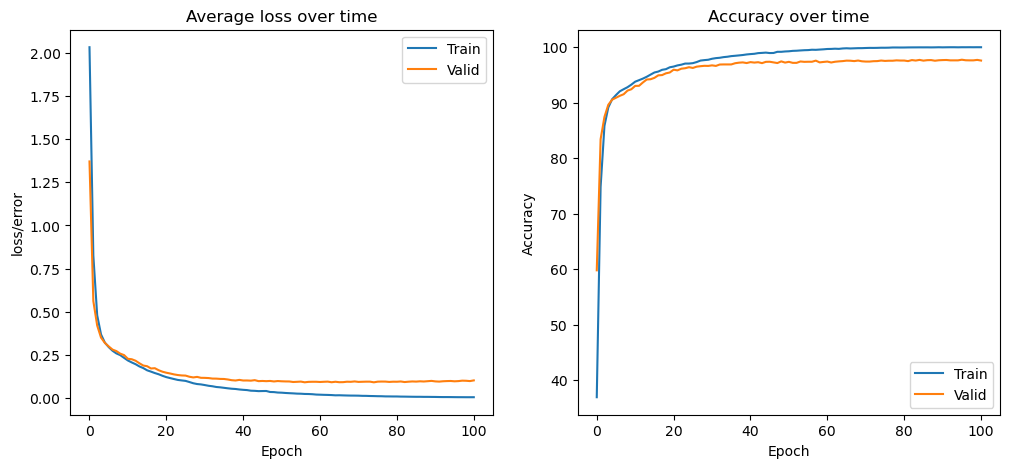

In [149]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, valid_losses)
plt.title('Average loss over time')
plt.ylabel("loss/error")
plt.xlabel("Epoch")
plt.legend(['Train', 'Valid'])

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, valid_accuracy)
plt.title('Accuracy over time')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Valid'])
plt.savefig('./assets/pytorch_simple_train.png')
plt.show()

In [150]:
torch.save(model.state_dict(), 'simple_model.pt') 

In [151]:
model = NeuralNetwork()
model.load_state_dict(torch.load('simple_model.pt'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)

In [152]:
test_correct = 0
test_sample = 0
for X_test, y_test in test_dataloader:
    y_pred = model.forward(X_test)

    _, predicted = torch.max(y_pred, 1)
    test_correct += (predicted == y_test).sum().item()
    test_sample += y_test.size(0)
    
accuracy = 100 * test_correct / test_sample
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 97.29


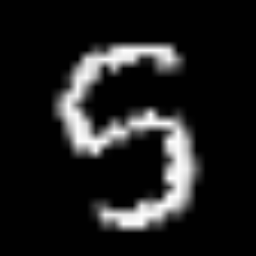

In [153]:
(transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
])
(test_dataset[10][0]))

In [154]:
test_dataset[10][1]

5

In [155]:
model(test_dataset[10][0])

tensor([[ 0.3262, -8.1487, -6.5854,  4.9555, -3.8585, 16.6909, -2.6191, -5.3758,
          6.5522,  7.3577]], grad_fn=<AddmmBackward0>)

In [156]:
torch.max(model(test_dataset[10][0]), 1)

torch.return_types.max(
values=tensor([16.6909], grad_fn=<MaxBackward0>),
indices=tensor([5]))